In [133]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
#load and inspect the data

df = pd.read_csv("all_data.csv")
#print(df.head())

In [69]:
#rename "Life expectancy..." column for ease
df = df.rename(columns={"Life expectancy at birth (years)": "Life_Exp"})
print(df.head())

  Country  Year  Life_Exp           GDP
0   Chile  2000      77.3  7.786093e+10
1   Chile  2001      77.3  7.097992e+10
2   Chile  2002      77.8  6.973681e+10
3   Chile  2003      77.9  7.564346e+10
4   Chile  2004      78.0  9.921039e+10


In [70]:
#explore the data

#put countries in a list
countries =df.Country.unique()
print(countries)

#see which years are included
years=df.Year.unique()
print(years)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: Life_Exp, dtype: float64


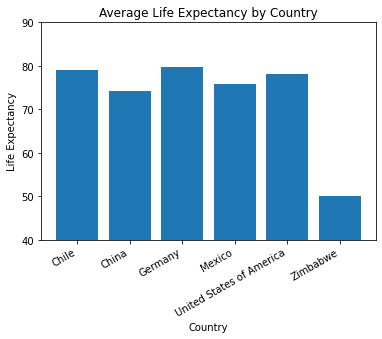

In [71]:
#find average life expectancy per country and plot it

avg_lf_exp = df.groupby('Country')['Life_Exp'].mean()
print(avg_lf_exp)       
plt.bar(countries, avg_lf_exp)  
ax=plt.subplot()

#set limit to y axis
ax.set_ylim(40, 90)

#add labels
plt.xlabel("Country")
plt.ylabel("Life Expectancy")
plt.title("Average Life Expectancy by Country")

#Rotate x labels
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

Country
Chile                       1.697888e+11
China                       4.957714e+12
Germany                     3.094776e+12
Mexico                      9.766506e+11
United States of America    1.407500e+13
Zimbabwe                    9.062580e+09
Name: GDP, dtype: float64


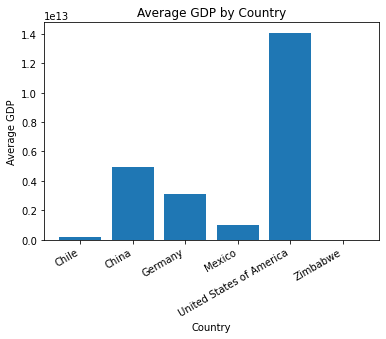

In [72]:
#find GDP per country and plot it.

avg_GDP = df.groupby('Country')['GDP'].mean()
print(avg_GDP)       
plt.bar(countries, avg_GDP)  
ax=plt.subplot()


#add labels
plt.xlabel("Country")
plt.ylabel("Average GDP")
plt.title("Average GDP by Country")

#Rotate x labels
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

[Text(0.5, 1.0, 'Life Expectancy by Country')]

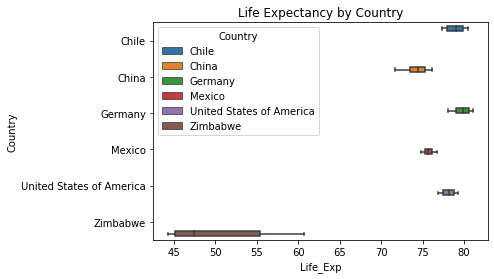

In [125]:
#Make a boxplot of Life Expectancy by country.

sns.boxplot(df, x = df.Life_Exp, y=df.Country, hue=df.Country).set(title = "Life Expectancy by Country")

[Text(0.5, 1.0, 'GDP by Country')]

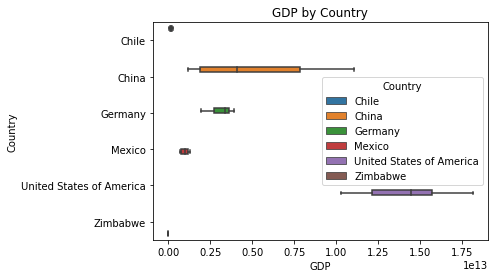

In [132]:
#Make a boxplot of GDP by country.

sns.boxplot(df, x = df.GDP, y=df.Country, hue=df.Country).set(title = "GDP by Country")

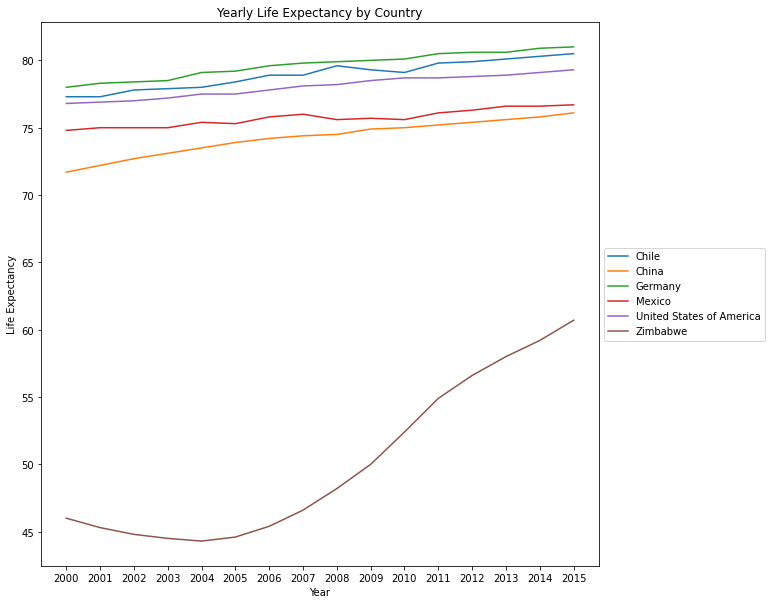

In [86]:
#See how Life Expectancy has changed annually by country

plt.figure(figsize=(10, 10))
ax= plt.subplot()
sns.lineplot(x=df.Year, y=df.Life_Exp, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

#add labels
plt.ylabel("Life Expectancy")
plt.title("Yearly Life Expectancy by Country")

#makes sure to include all the years
ax.set_xticks(years)

plt.show()




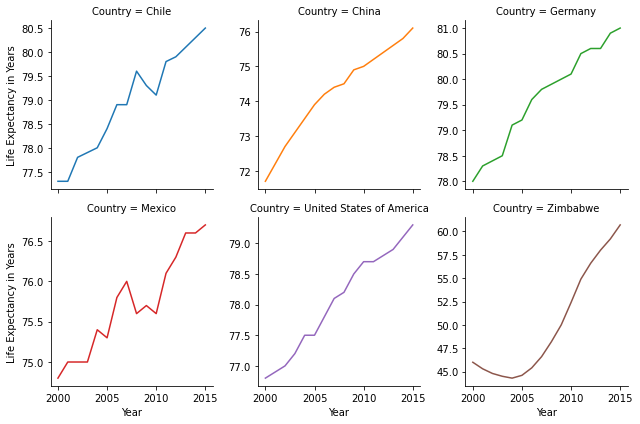

In [104]:
#Because the range is so large above, its best to look at each country individually

lf_exp_facet = sns.FacetGrid(df, col = "Country", col_wrap = 3, hue="Country", sharey = False)
lf_exp_facet.map(sns.lineplot, 'Year', "Life_Exp").set_axis_labels("Year", "Life Expectancy in Years")


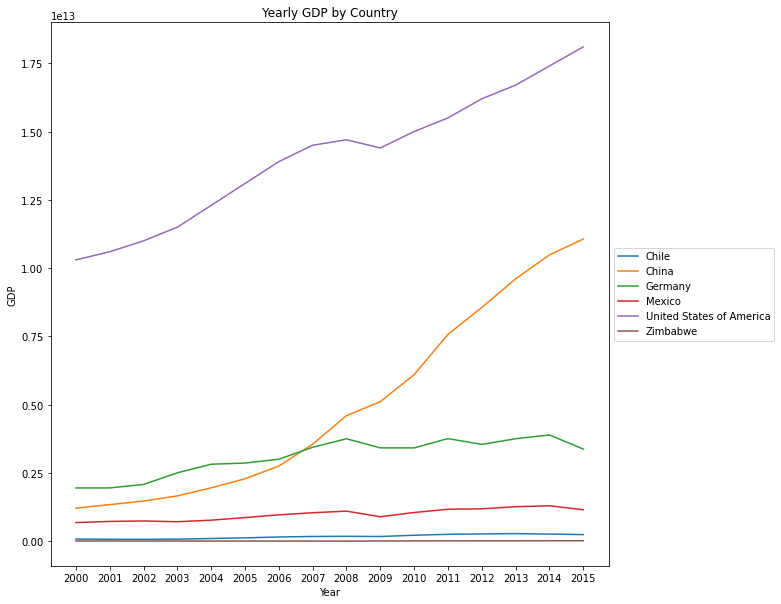

In [89]:
#See how GDP has changed annually by country

plt.figure(figsize=(10, 10))
ax= plt.subplot()
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

#add labels
plt.ylabel("GDP")
plt.title("Yearly GDP by Country")

#makes sure to include all the years
ax.set_xticks(years)

plt.show()


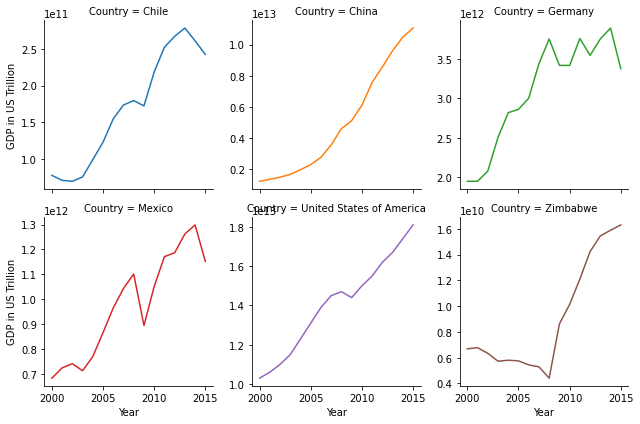

In [112]:
#Because the range is so large above, its best to look at each country individually

gdp_facet = sns.FacetGrid(df, col = "Country", col_wrap = 3, hue="Country", sharey = False)
gdp_facet.map(sns.lineplot, 'Year', "GDP").set_axis_labels("Year", "GDP in US Trillion")

[Text(0.5, 1.0, 'Life Expectancy vs GDP')]

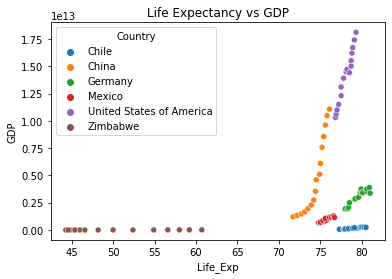

In [111]:
#Now let's explore how GDP and Life Expectancy are related
#Here I'll just do a simply GDP vs Life Expectancy scatter plot

sns.scatterplot(df, x=df.Life_Exp, y=df.GDP, hue=df.Country).set(title = "Life Expectancy vs GDP")


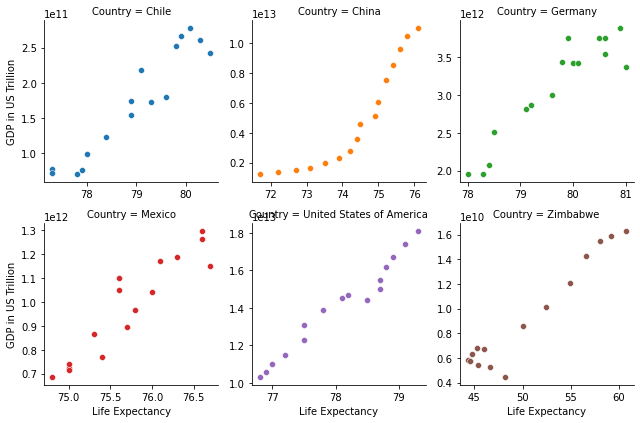

In [122]:
#Let's break it down by country again

gdp_lfe_facet = sns.FacetGrid(df, col = "Country", col_wrap = 3, hue="Country", sharey = False, sharex= False)
gdp_lfe_facet.map(sns.scatterplot, 'Life_Exp', "GDP").set_axis_labels("Life Expectancy", "GDP in US Trillion")
